In [181]:
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
# load the dataset and inpsect the first few entries 
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
# look at number of observations and variables
print("Shape of data is:", df.shape)

# take a look at the data types of the variables and can get a quick estimate of the number of missing values for each variable
df.info()

Shape of data is: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [184]:
# We can drop 'PassengerId', 'Name', and 'Ticket' and 'Cabin' as they are not categorial or numerical and not needed for this EDA, 
# besides 'Cabin' also has too many missing values.
df=df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin' ], axis=1)

# We are interested in 'Survived' as the variable of interest (dependent variable). 
# Here are some simple calculations for the mean survival rate by passenger class, sex & embarkation point. 

print(df.groupby(['Pclass']).mean(numeric_only=True).loc[:,'Survived'])
print(df.groupby(['Sex']).mean(numeric_only=True).loc[:,'Survived'])
print(df.groupby(['Embarked']).mean(numeric_only=True).loc[:,'Survived'])

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


#### What is the most important factor in determining survival of the Titanic incident?

Here we shall use label encoding to convert variables into numerical form so that we can perform a calculation of the correlation matrix


<Axes: >

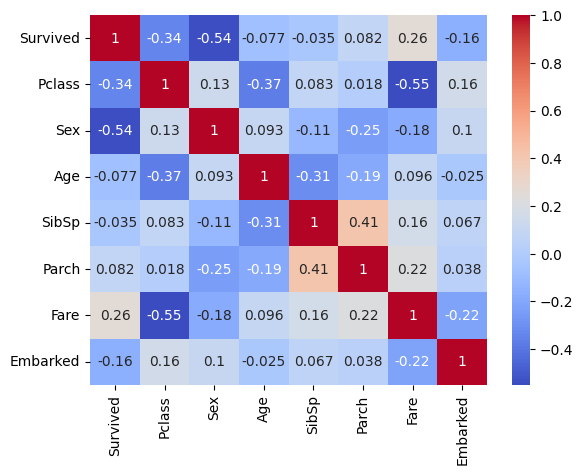

In [185]:
# label encoding to convert the 'Sex' and 'Embarkation' variables into numerical form in preparation machine learning
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
#df.head()

# calculate and plot the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

The above correlation matrix shows that Sex, Passenger Class and Fare are the most important factors. Sex seems to be the most important factor as it has the highest correlation and this is backed up by the intial summary statistics - 74% of females survived compared to 19% for males.

#### In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

The following code snippet generates a simple bar plot of the survival rate for the different passenger classes. 

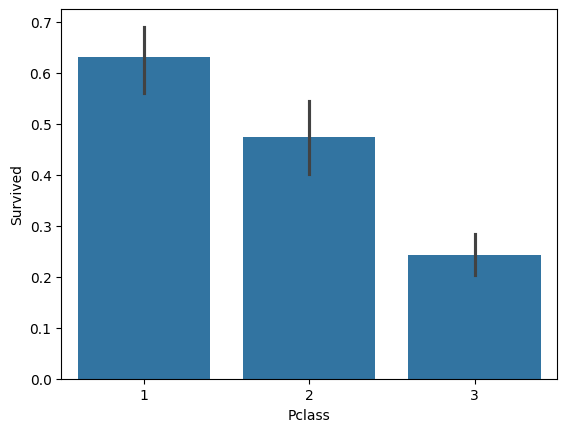

In [186]:
ax = sns.barplot(x="Pclass", y="Survived", data=df)

The figure shows that the 1st class passengers survived more that 2nd class passengers who in turn survived more than 3rd class passengers. This does indicate that wealthier passengers were treated better during the evacuation process and that the upper-class passengers were given preference on the lifeboats.

#### “Women and children first”. Was this the case?

[[Text(0, 0, 'female'), Text(1, 0, 'male')], Text(0, 0.5, 'Survival rate')]

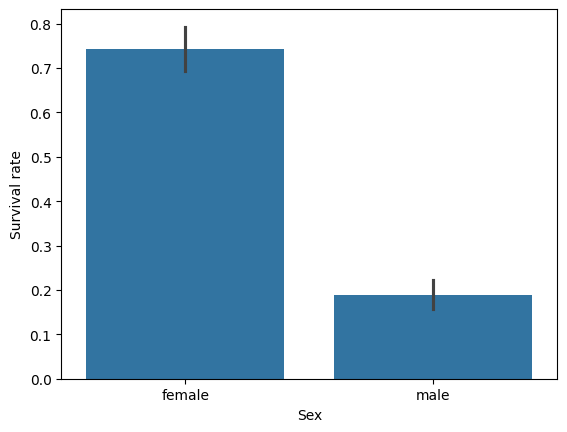

In [187]:
ax = sns.barplot(x="Sex", y = "Survived", data = df)

ax.xaxis.set_ticks([0,1])
ax.set(xticklabels=["female", "male"],ylabel="Survival rate")

The above plot shows that females were prioritised as they had a much higher survival rate than males.

<Axes: xlabel='Age', ylabel='Count'>

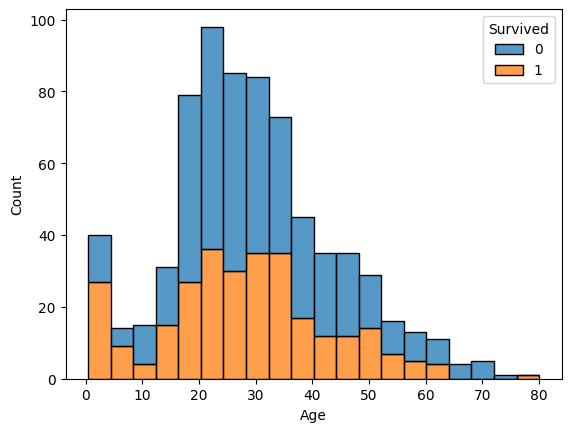

In [188]:
# Filling null values of age with the median
# df['Age'] = df['Age'].fillna((df['Age'].median()))

sns.histplot(data=df, x="Age", hue="Survived", multiple="stack")

It is difficult to see with the plot if children were prioritised. So next I will add a new column labeled by if the passanger is a child or not and then groupby this variable to produce the survival rate for both categories.

In [189]:
df.loc[(df.Age < 18),  'AgeGroup'] = 'Child'
df.loc[(df.Age >= 18),  'AgeGroup'] = 'Adult'
print(df.groupby(['AgeGroup']).mean(numeric_only=True).loc[:,'Survived'])

AgeGroup
Adult    0.381032
Child    0.539823
Name: Survived, dtype: float64


From these summary survival rates it does seem that children were slightly prioritised but to a lesser degree than women and higher class passengers.

#### Add one other observation that you have noted in the dataset.

The below count plot of embarkation point grouped/coloured by survival shows that only passengers boarding at C = Cherbourg had a higher chance of survival than dying. On further research, I found that after leaving Southampton the Titanic picked up mainly 1st and 2nd class passengers at Cherbourg (France), and so this fits with the previous analysis.

<Axes: xlabel='Embarked', ylabel='count'>

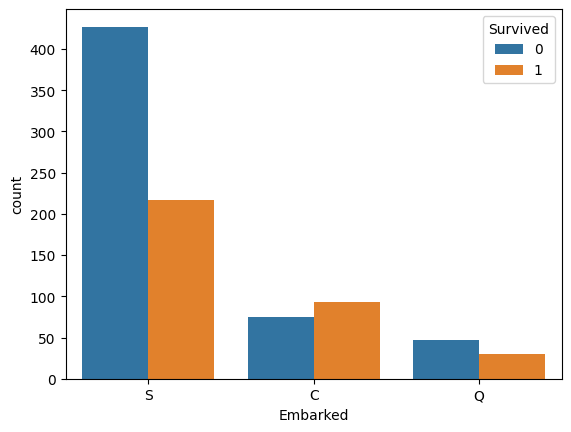

In [190]:
df = pd.read_csv("Titanic.csv")
sns.countplot(df, x="Embarked", hue="Survived")